In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

# drawing the data

In [3]:
signal = pd.read_csv('/content/data1_Signal.csv')
print(signal)

         x      y
0    0.010  0.958
1    0.014  1.034
2    0.018  1.109
3    0.022  1.094
4    0.027  1.104
..     ...    ...
235  0.983 -0.975
236  0.988 -0.903
237  0.992 -1.331
238  0.996 -0.913
239  1.000 -1.019

[240 rows x 2 columns]


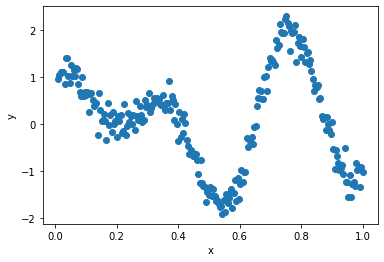

In [4]:
plt.scatter(signal['x'],signal['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Gradient Descent

In [5]:
def compute_cost(X, y, theta,type):
  #Compute the  MSE or RMSE cost of a particular choice of theta for linear regression.
  #Input Parameters:
  #X : inpit's x with a column of  ones Dimension needs to be (m x n)
  #m= number of training examples
  #n= number of features (including X_0 column of ones)
  #y : 1D array of labels. dimension(1 x m)
  #theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  #Output Parameters:
  #J : error
  m=len(y)
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  j2 = np.sqrt((1/m) * np.sum(sqrErrors))
  J = (1/m) * errors.T.dot(errors)
  if type =='mse':
    return J
  elif type=="rmse":
    return j2

In [15]:
x_train, x_test, y_train1, y_test1 = train_test_split(signal['x'], signal['y'],test_size=0.3)

In [64]:
def gradient_descent(alpha, iterations,type,degree):
  
#Compute cost for linear regression.
#Input Parameters:
#X :input x and a column of ones each row represents the training example and each column represent the feature ndarray. fial Dimension(m x n)
#m= number of training examples
#n= number of features (including X_0 column of ones)
#y : 1D array of labels, dimension(m x 1)
#theta : Dimension (1 x n)
#alpha : Learning rate
#iterations: Number of iterations. 
#Output Parameters
# theta : Final Value (1 x n)
#cost_history (train error): Conatins value of cost for each iteration (m x 1)
#theta_variation: d_theta * alpha-required for plotting
#test error
  #x_train, x_test, y_train, y_test = train_test_split(signal['x'].to_numpy, signal['y'].to_numpy(),test_size=0.3)
  y_train=y_train1.to_numpy()
  y_test=y_test1.to_numpy()
  X1=np.c_[ x_train.to_numpy(), np.ones(len(x_train)) ] 
  tmp=np.ones((len(x_train),(degree-2)))
  

  X1 = np.append(X1, tmp, axis=1)
  theta_variation=[]
  theta1 = np.zeros(degree)
  #for i in range(degree-2):
  #  X1=np.c_[X1, np.ones(len(x_test)) ] 
  cost_history = np.zeros(iterations)
  m=len(x_train)
  #train error
  for i in range(iterations):
    predictions = X1.dot(theta1.T)
    errors = np.subtract(predictions, y_train)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta1 = theta1 - sum_delta;

    cost_history[i] = compute_cost(X1, y_train, theta1,type)
    X = np.ones((degree, len(x_train)))
    for i in range(degree):
      X[i] = x_train**i
    theta = np.random.randn(degree, 1)*np.sqrt(1/(degree))
    h = np.dot(theta.T, X)
    #alpha 
    for i in range(iteration_count):
      if type == 'mse':
        d_theta = 1/m * np.sum((h - y_train.T), axis=1) * np.sum(X, axis=1)
        d_theta = d_theta.reshape(degree, 1)
      elif error_function == 'rmse':
        d_theta = 1/m * np.sum((h - y_train.T), axis=1) * np.sum(X, axis=1)  * (((1/m) * np.sum(((h - y_train.T)**2), axis=1))**(-1/2))
        d_theta = d_theta.reshape(degree, 1)
      theta_variation.append(alpha * d_theta)
  #test error
  test_err=[]
  #X_test=np.c_[ x_test.to_numpy, np.ones(len(x_test)) ]
  #for i in range(degree-2):
  #  X_test=np.c_[X_test, np.ones(len(x_test)) ] 
  X_test = np.ones((degree, len(x_test)))
  for i in range(degree):
    X_test[i] = x_test**i
  test_result = np.dot(theta.T, X_test)
  for i in range(iterations):
    if type == 'mse':
      test_error = (1/len(X_test)) * np.sum(((test_result - y_test.T)**2), axis=1)
    elif type == 'rmse':
      test_error = ((1/len(X_test)) * np.sum(((test_result - y_test.T)**2), axis=1))**(1/2)
    test_err.append(test_error)

  #plots
  #train error
  plt.plot(range(len(cost_history)), cost_history)
  plt.title(f'degree = {degree}, iterations = {iterations}, cost function = {type}')
  plt.xlabel('iteration count')
  plt.ylabel(' train error')
  plt.show()
  #test error
  plt.plot(range(len(test_error)), test_error)
  plt.title(f'degree = {degree}, iterations = {iterations}, cost function = {type}')
  plt.xlabel('iteration count')
  plt.ylabel(' test error')
  plt.show()
    
  np_theta_variation = np.array(theta_variation)
  np_theta_variation=np_theta_variation.transpose(2,0,1).reshape(degree,-1)
    
  #plt.plot(range(iterations), np_theta_variation[0,:])
  #plt.title('theta variations')
  #plt.xlabel('iteration count')
  #plt.ylabel('theta changes')
  #plt.show()

      

  return theta, cost_history,theta_variation,test_error

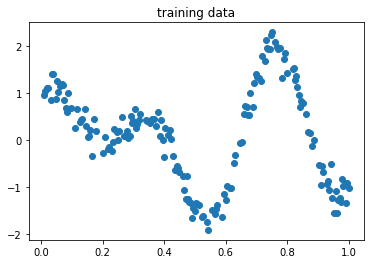

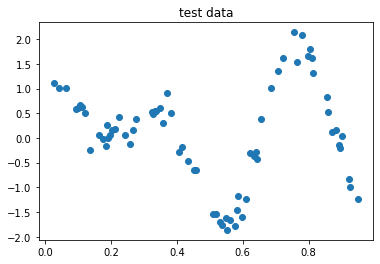

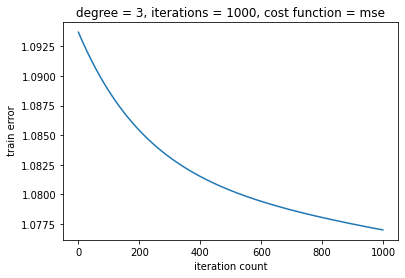

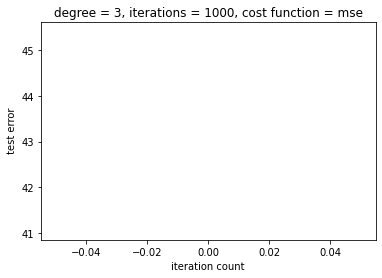

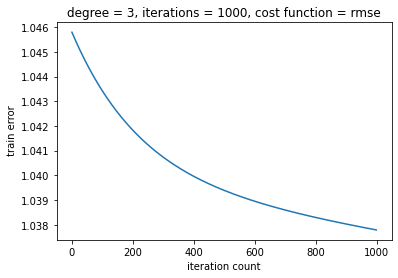

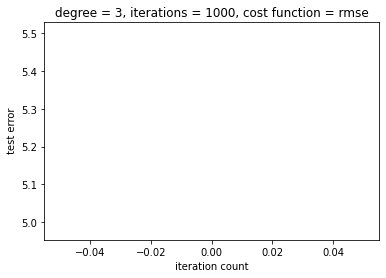

In [ ]:
alpha=0.001
plt.scatter(x_train, y_train1)
plt.title("training data")
plt.show()
plt.scatter(x_test, y_test1)
plt.title("test data")
plt.show()   
for degree in (3,5,7):
    for iteration_count in (1000, 10000):
        for error_function in ('mse', 'rmse'):
            gradient_descent(alpha, iteration_count, error_function,degree)

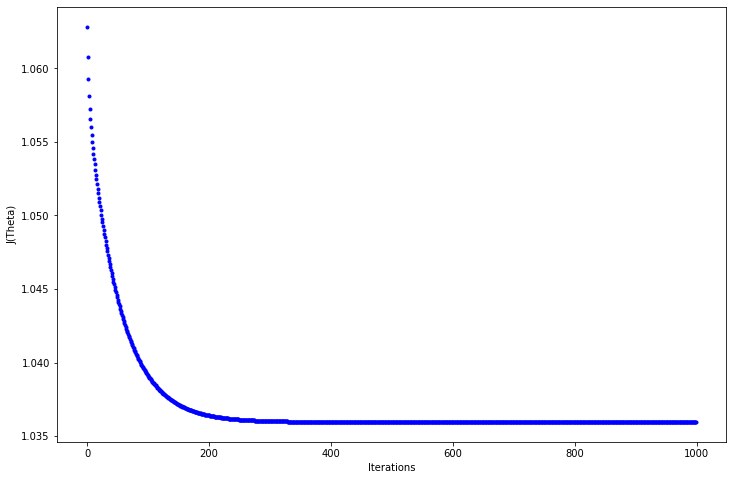

In [20]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),cost_history,'b.')


# plots